In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Flatten,Activation
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from numpy import *
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from keras.optimizers import SGD,RMSprop,adam

#/home/talha/Downloads/all/imagecl/all

data_path = "/home/talha/Downloads/all/imagecl/all"
preprocess_data_path="/home/talha/Downloads/all/imagecl/preprocess_data"
data_dir_list = os.listdir(data_path)

img_rows=255
img_cols=255
num_channel=1

num_classes = 3

img_data_list=[]

for file in data_dir_list:
    im=Image.open(data_path+"//"+file)
    img=im.resize((img_rows,img_cols))
    gray=img.convert('L')
    gray.save(preprocess_data_path+"//"+file,"JPEG")

imlist=os.listdir(preprocess_data_path)
imlist.sort()
imatrix=array([array(Image.open(preprocess_data_path+"//"+im2)).flatten()
              for im2 in imlist],'f')
num_samples=size(data_dir_list)
label=ones((num_samples,),dtype=int)

label[0:231]=0
label[231:749]=1
label[749:967]=2
data,Label=shuffle(imatrix,label,random_state=2)

img=imatrix[0].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
train_data=[data,Label]
print train_data[0].shape
print train_data[1].shape

(x,y)=(train_data[0],train_data[1])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
#print x_train.shape
#print x_test.shape
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /=255
x_test /=255

y_train = keras.utils.to_categorical(y_train,num_classes=3)
y_test = keras.utils.to_categorical(y_test,num_classes=3)

i=2
#plt.imshow(x_train[100,:],interpolation='nearest')
print y_train[0,:]



/home/talha/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(967, 65025)
(967,)
[1. 0. 0.]


In [4]:
batch_size=128
nb_classes=3
nb_epoch=15
nb_filters=32
nb_pool=2
nb_conv=3


model = Sequential()
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(img_rows,img_cols,1)))
model.add(Convolution2D(32,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(3))
#model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer = 'adadelta', metrics = ['accuracy'])

model.summary()
model.fit(x_train,y_train,nb_epoch=nb_epoch,validation_data=(x_test,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 253, 253, 32)      320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 251, 251, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 125, 125, 32)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 500000)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               64000128  
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

/home/talha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 773 samples, validate on 194 samples
Epoch 1/15
773/773 [==============================] - 141s 182ms/step - loss: 7.3460 - acc: 0.5097 - val_loss: 6.8959 - val_acc: 0.5722
Epoch 2/15
773/773 [==============================] - 137s 177ms/step - loss: 7.6316 - acc: 0.5265 - val_loss: 6.8959 - val_acc: 0.5722
Epoch 3/15
773/773 [==============================] - 137s 177ms/step - loss: 7.6316 - acc: 0.5265 - val_loss: 6.8959 - val_acc: 0.5722
Epoch 4/15
773/773 [==============================] - 137s 177ms/step - loss: 7.6316 - acc: 0.5265 - val_loss: 6.8959 - val_acc: 0.5722
Epoch 5/15
773/773 [==============================] - 137s 177ms/step - loss: 7.6316 - acc: 0.5265 - val_loss: 6.8959 - val_acc: 0.5722
Epoch 6/15
773/773 [==============================] - 137s 177ms/step - loss: 7.6316 - acc: 0.5265 - val_loss: 6.8959 - val_acc: 0.5722
Epoch 7/15
773/773 [==============================] - 137s 177ms/step - loss: 7.6316 - acc: 0.5265 - val_loss: 6.8959 - val_acc: 0.5722
Ep

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = x_test[0:1]
print (test_image.shape)

print(model.predict(test_image))


('Test Loss:', 6.8958863327183675)
('Test accuracy:', 0.5721649484536082)
(1, 255, 255, 1)
[[0. 1. 0.]]


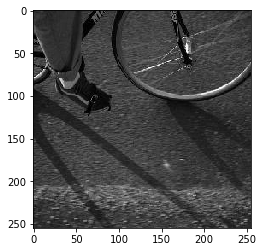

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [24]:
plt.show(test_image)
print(model.predict_classes(test_image))
print(y_test[0:1])

In [32]:
files=os.listdir(data_path)
file=files[0]
imrs=Image.open(data_path+"//"+file)
imrs=imrs.resize((img_rows,img_cols))
imrs=imrs.convert('L')
imrs=array(imrs)
imrs=imrs.astype('float32')
print imrs.shape



(255, 255)


In [33]:
#
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)#
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')


NameError: global name 'K' is not defined